Loading required packages

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
[train.shape, test.shape]

[(891, 12), (418, 11)]

## Features - description

In [6]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

* Survived - Survival
* Pclass - passenger's class
* Name - passenger's name
* Sex - passenger's sex
* Age - passenger's age
* SibSp - number of siblings/spouses aboard
* Parch - number of parents/children aboard
* Ticket - ticket number
* Fare - fare
* Cabin - number of cabin
* Embarked - port of embarkation

### Categorical features:
* Survived: 0 - No, 1 - Yes
* Sex: female, male
* Embarked: C - Cherbourg, Q - Queenstown, S - Southampton
#### Ordinal:
* Pclass: 1 - upper, 2 - middle, 3 - lower

### Numerical features:
#### Continous:
* Age
* Fare

#### Discrete:
* SibSp
* Parch

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are missing data for Age, Cabin and Embarked variables

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pinsky, Mrs. (Rosa)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## Survived

In [10]:
train.Survived.count() # No data missing

891

In [11]:
train.Survived.value_counts() # distribution

0    549
1    342
Name: Survived, dtype: int64

## Pclass

In [12]:
train.Pclass.value_counts() # distribution

3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see that the  most passengers come from 3rd class

In [13]:
pd.crosstab(train.Survived, train.Pclass, normalize='index') # distribution within classes

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


In [33]:
#Average survival in groups designated by Pclass
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Sex

In [14]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
pd.crosstab(train.Survived, train.Sex, normalize='index') # distribution within classes

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [34]:
#Average survival in groups designated by Sex
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Age

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


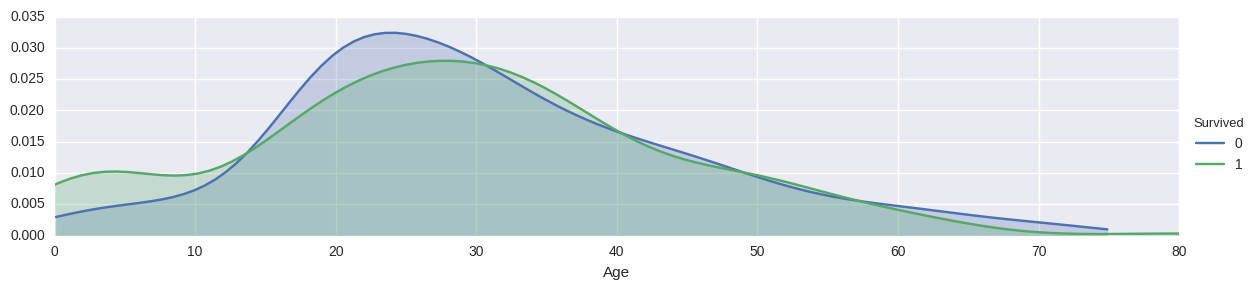

In [16]:
dAge = sns.FacetGrid(train, hue='Survived', aspect=4)
dAge.map(sns.kdeplot, 'Age', shade=True)
dAge.set( xlim=(0, train['Age'].max()))
dAge.add_legend()

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


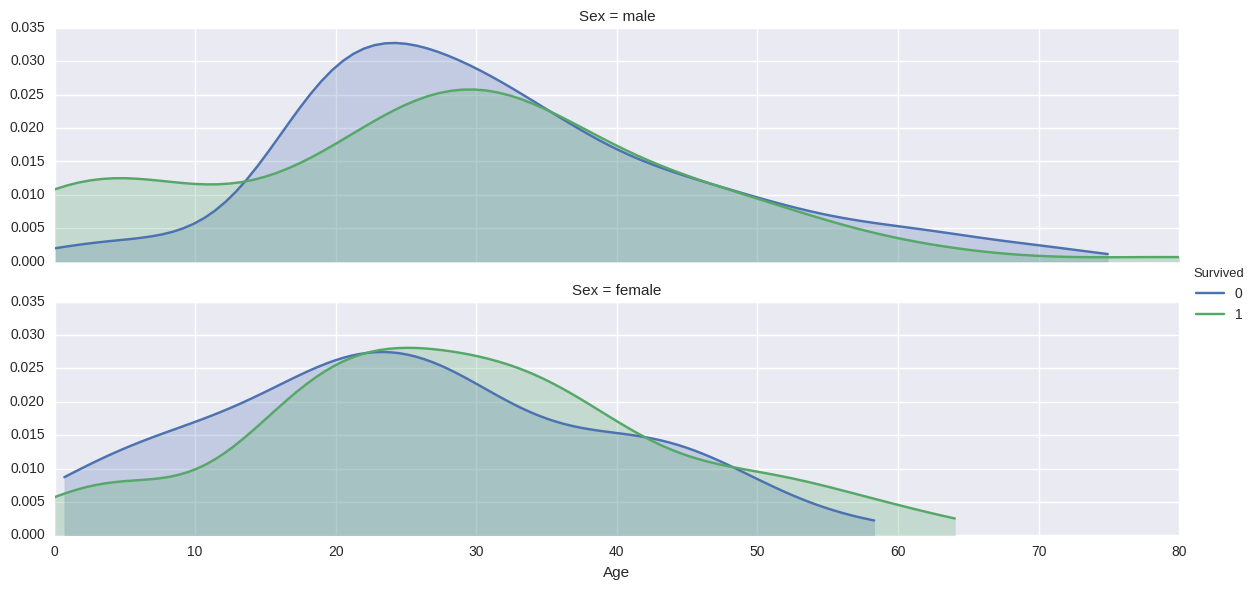

In [17]:
dAgeSex = sns.FacetGrid(train, hue='Survived', row='Sex', aspect=4)
dAgeSex.map(sns.kdeplot, 'Age', shade=True)
dAgeSex.set( xlim=(0, train['Age'].max()))
dAgeSex.add_legend()

## SibSp

In [18]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
pd.crosstab(train.Survived, train.SibSp, normalize='index') # distribution within classes

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,0.724954,0.176685,0.027322,0.021858,0.027322,0.009107,0.01275
1,0.614035,0.327485,0.038012,0.011696,0.008772,0.000000,0.00000


In [35]:
#Average survival in groups designated by SibSp
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Parch

In [20]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
pd.crosstab(train.Survived, train.Parch, normalize='index') # distribution within classes

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,0.810565,0.096539,0.072860,0.003643,0.007286,0.007286,0.001821
1,0.681287,0.190058,0.116959,0.008772,0.000000,0.002924,0.000000


In [36]:
#Average survival in groups designated by Parch
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## Fare

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


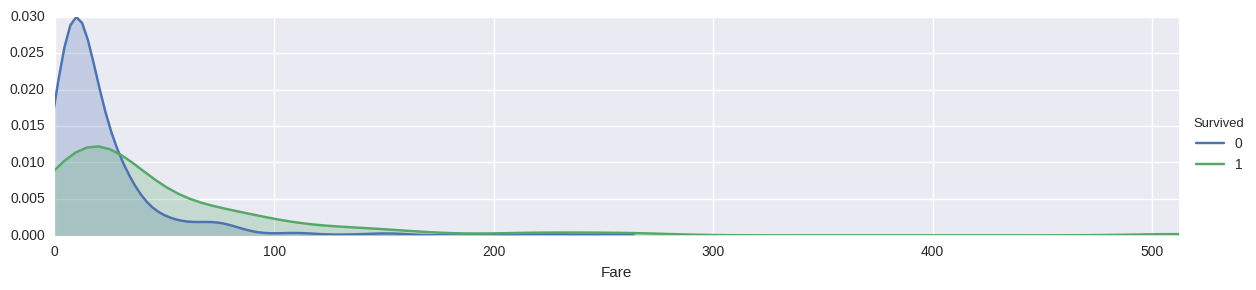

In [22]:
dFare = sns.FacetGrid(train, hue='Survived', aspect=4)
dFare.map(sns.kdeplot, 'Fare', shade=True)
dFare.set( xlim=(0, train['Fare'].max()))
dFare.add_legend()

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


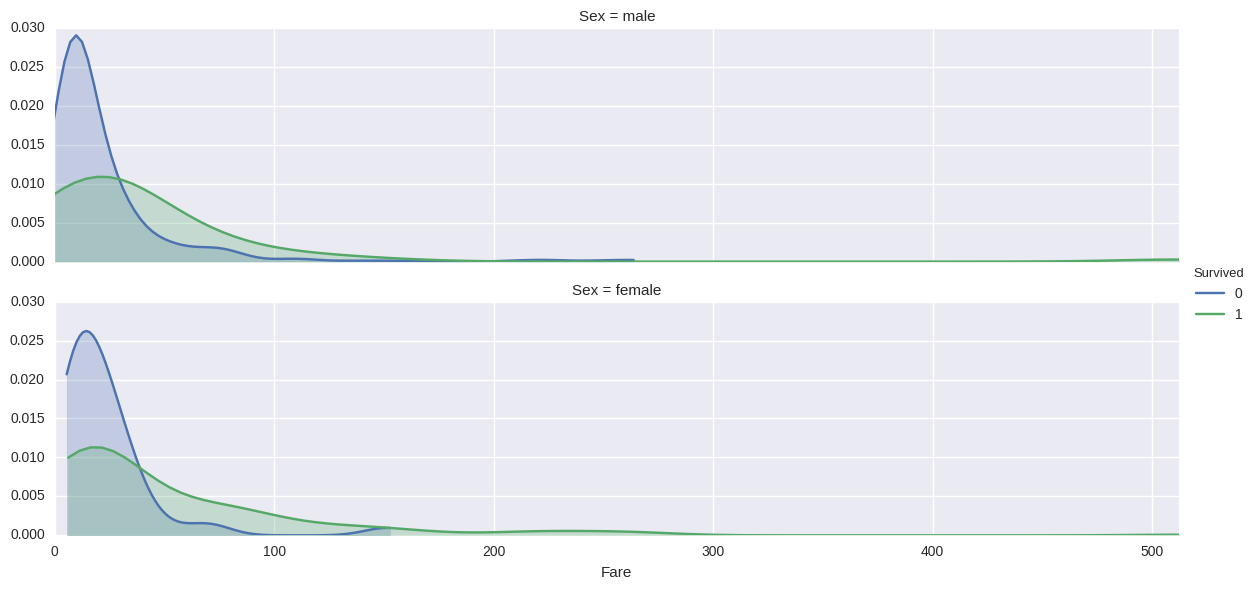

In [23]:
dFareSex = sns.FacetGrid(train, hue='Survived', row='Sex', aspect=4)
dFareSex.map(sns.kdeplot, 'Fare', shade=True)
dFareSex.set( xlim=(0, train['Fare'].max()))
dFareSex.add_legend()

## Embarked

In [24]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
pd.crosstab(train.Survived, train.Embarked, normalize='index') # distribution within classes

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235


# Correlation

In [27]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


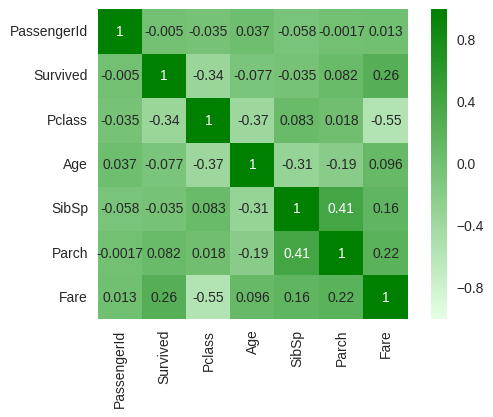

In [28]:
cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(train.corr(), cmap=cmap, annot=True, square=True)

# Completing missing values
For numerical features missing data will be replaced by mean and for categorical features by the most common value

### Age

In [38]:
train.Age = train.Age.fillna(train.Age.mean())

### Embarked

In [42]:
most_freq = train.Embarked.dropna().mode()[0]
train.Embarked = train.Embarked.fillna(most_freq)

# Converting categorical features to numerical values

### Sex: female -> 1, men -> 0

In [46]:
train.Sex = train.Sex.map({'male':0, 'female': 1})

In [49]:
pd.crosstab(train.Survived, train.Sex, normalize='index')

Sex,0,1
Survived,,
0,0.852459,0.147541
1,0.318713,0.681287


### Embarked: S -> 0, C -> 1, Q -> 2

In [47]:
train.Embarked = train.Embarked.map({'S':0, 'C': 1, 'Q': 2})

In [50]:
pd.crosstab(train.Survived, train.Embarked, normalize='index')

Embarked,0,1,2
Survived,,,
0,0.777778,0.136612,0.085610
1,0.640351,0.271930,0.087719


# Significance